In [1]:
# Standard imports
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt

# pandas settings
pd.options.display.max_rows = 1_000
pd.options.display.max_columns = 1_000
pd.options.display.max_colwidth = 1_000
import warnings
warnings.filterwarnings('ignore')

In [2]:
badminton = pd.read_csv('badminton.csv')
tawa = pd.read_csv('tawa.csv')
tea = pd.read_csv('tea.csv')

In [3]:
# view dataset
display(badminton.head(1))
display(tawa.head(1))
tea.head(1)

,Reviewer Name,Review Title,Place of Review,Up Votes,Down Votes,Month,Review text,Ratings
0,Kamal Suresh,Nice product,"Certified Buyer, Chirakkal",889.0,64.0,Feb 2021,"Nice product, good quality, but price is now rising which is a bad sign. 800-850 was an affordable price, especially when we play everyday. So kindly help us out in terms of the price. Thank You.READ MORE",4


,Reviewer_Name,Reviewer_Rating,Review_Title,Review_Text,Place_of_Review,Date_of_Review,Up_Votes,Down_Votes
0,Sumit Kumar,5.0,Wonderful,I think In this price category it's best dosa tawa. I tried it and it turned out to be great. Thanks Flipkart!READ MORE,"Certified Buyer, Lakhisarai",Sumit Kumar,211,39


,reviewer_name,reviewer_rating,review_title,review_text,place_of_review,Date_of_review,up_votes,Down_votes
0,Subhro Banerjee,5,Worth every penny,Great product 🤗 with great deals 😍😍 Tata Tea Gold is best till now since I used it . ❤️READ MORE,"Certified Buyer, Budge Budge",Subhro Banerjee,236,59


In [4]:
tea.shape

(9170, 8)

In [5]:
# rename columns
badminton = badminton.rename(columns={'Reviewer Name': 'reviewer_name',
                              'Review Title':'review_title',
                              'Place of Review':'place_of_review',
                              'Up Votes':'up_votes',
                              'Down Votes':'down_votes',
                              'Month':'date_of_review',
                              'Review text':'review_text',
                              'Ratings':'reviewer_rating'})

tawa = tawa.rename(columns= {'Reviewer_Name':'reviewer_name',
                             'Reviewer_Rating':'reviewer_rating',
                             'Review_Title':'review_title',
                             'Review_Text':'review_text',
                             'Place_of_Review':'place_of_review',
                             'Date_of_Review':'date_of_review',
                             'Up_Votes':'up_votes',
                             'Down_Votes':'down_votes'})

tea = tea.rename(columns={'Date_of_review':'date_of_review',
                          'Down_votes':'down_votes'})

In [6]:
# rearrange badminton columns

badminton = badminton[['reviewer_name', 'reviewer_rating', 'review_title', 'review_text',
 'place_of_review', 'date_of_review', 'up_votes', 'down_votes']]

In [7]:
# add extra column for product name
badminton['product_name'] = 'badminton'
tawa['product_name'] = 'tawa'
tea['product_name'] = 'tea'

In [8]:
# confims dataset changes
display(badminton.head(1))
display(tawa.head(1))
tea.head(1)

,reviewer_name,reviewer_rating,review_title,review_text,place_of_review,date_of_review,up_votes,down_votes,product_name
0,Kamal Suresh,4,Nice product,"Nice product, good quality, but price is now rising which is a bad sign. 800-850 was an affordable price, especially when we play everyday. So kindly help us out in terms of the price. Thank You.READ MORE","Certified Buyer, Chirakkal",Feb 2021,889.0,64.0,badminton


,reviewer_name,reviewer_rating,review_title,review_text,place_of_review,date_of_review,up_votes,down_votes,product_name
0,Sumit Kumar,5.0,Wonderful,I think In this price category it's best dosa tawa. I tried it and it turned out to be great. Thanks Flipkart!READ MORE,"Certified Buyer, Lakhisarai",Sumit Kumar,211,39,tawa


,reviewer_name,reviewer_rating,review_title,review_text,place_of_review,date_of_review,up_votes,down_votes,product_name
0,Subhro Banerjee,5,Worth every penny,Great product 🤗 with great deals 😍😍 Tata Tea Gold is best till now since I used it . ❤️READ MORE,"Certified Buyer, Budge Budge",Subhro Banerjee,236,59,tea


In [9]:
# concatenate dataframe into one
df = pd.concat([badminton,tawa,tea], ignore_index=True)
df.sample(2)

,reviewer_name,reviewer_rating,review_title,review_text,place_of_review,date_of_review,up_votes,down_votes,product_name
130,Ashal Ravi,5.0,Just wow!,Best oneREAD MORE,"Certified Buyer, Killiyoor",NaN,1.0,0.0,badminton
5810,Flipkart Customer,5.0,Worthless,goodREAD MORE,"Certified Buyer, Koratty",Mar 2019,0.0,0.0,badminton


In [10]:
# check duplicates
df.duplicated().sum()

9223

In [11]:
df.drop_duplicates(inplace=True)

In [12]:
# view missing data proportion
df.isna().sum()#/df.shape[0] * 100

reviewer_name        6
reviewer_rating    237
review_title         6
review_text          4
place_of_review     46
date_of_review     461
up_votes             6
down_votes           6
product_name         0
dtype: int64

In [13]:
#drop nan reviews and ratings
df = df.dropna(subset=['review_text','reviewer_rating'])

In [14]:
# Transforming reviewer_rating column

def sentiment(reviewer_rating):
    if reviewer_rating >= 3:
        review = 1
    else:
        review = 0
    return review

df["sentiment"]= df["reviewer_rating"].apply(sentiment)

In [15]:
# dataset shape
df.shape

(10755, 10)

In [16]:
# data info
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10755 entries, 0 to 11069
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   reviewer_name    10753 non-null  object 
 1   reviewer_rating  10755 non-null  float64
 2   review_title     10753 non-null  object 
 3   review_text      10755 non-null  object 
 4   place_of_review  10713 non-null  object 
 5   date_of_review   10298 non-null  object 
 6   up_votes         10753 non-null  float64
 7   down_votes       10753 non-null  float64
 8   product_name     10755 non-null  object 
 9   sentiment        10755 non-null  int64  
dtypes: float64(3), int64(1), object(6)
memory usage: 924.3+ KB


In [17]:
df.to_csv('product_reviews.csv',index=False)

In [18]:
df=pd.read_csv('product_reviews.csv')
df.sample(2)

,reviewer_name,reviewer_rating,review_title,review_text,place_of_review,date_of_review,up_votes,down_votes,product_name,sentiment
4832,Raju Buragohain,5.0,Classy product,excellentREAD MORE,"Certified Buyer, Mumbai",Jan 2020,0.0,0.0,badminton,1
7936,Flipkart Customer,5.0,Terrific,ExcellentREAD MORE,"Certified Buyer, Longowal",Oct 2017,0.0,0.0,badminton,1


# EDA

In [19]:
df['sentiment'].value_counts()

sentiment
1    9682
0    1073
Name: count, dtype: int64

We can see from above that it is an highly imbalanced dataset

In [20]:
from sklearn.model_selection import train_test_split

# Split Data
X = df['review_text']
y = df['sentiment']

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state=1)

In [21]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(8604,) (8604,)
(2151,) (2151,)


In [22]:
import string
import re
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer

In [23]:
# initialise the Stemmer
stemmer = PorterStemmer()

In [24]:
# initialise Lemmatizer
lemmatizer = WordNetLemmatizer()

## Data Preprocessing on train data

## Word Cloud

In [25]:
from wordcloud import WordCloud

In [26]:
def display_wordcloud(data):
    wc = WordCloud(background_color='black',
               width=1600,
               height=800).generate(data)
    plt.figure(1,figsize=(30,20))
    plt.imshow(wc)
    plt.axis('off')
    plt.show()

### Positive reviews

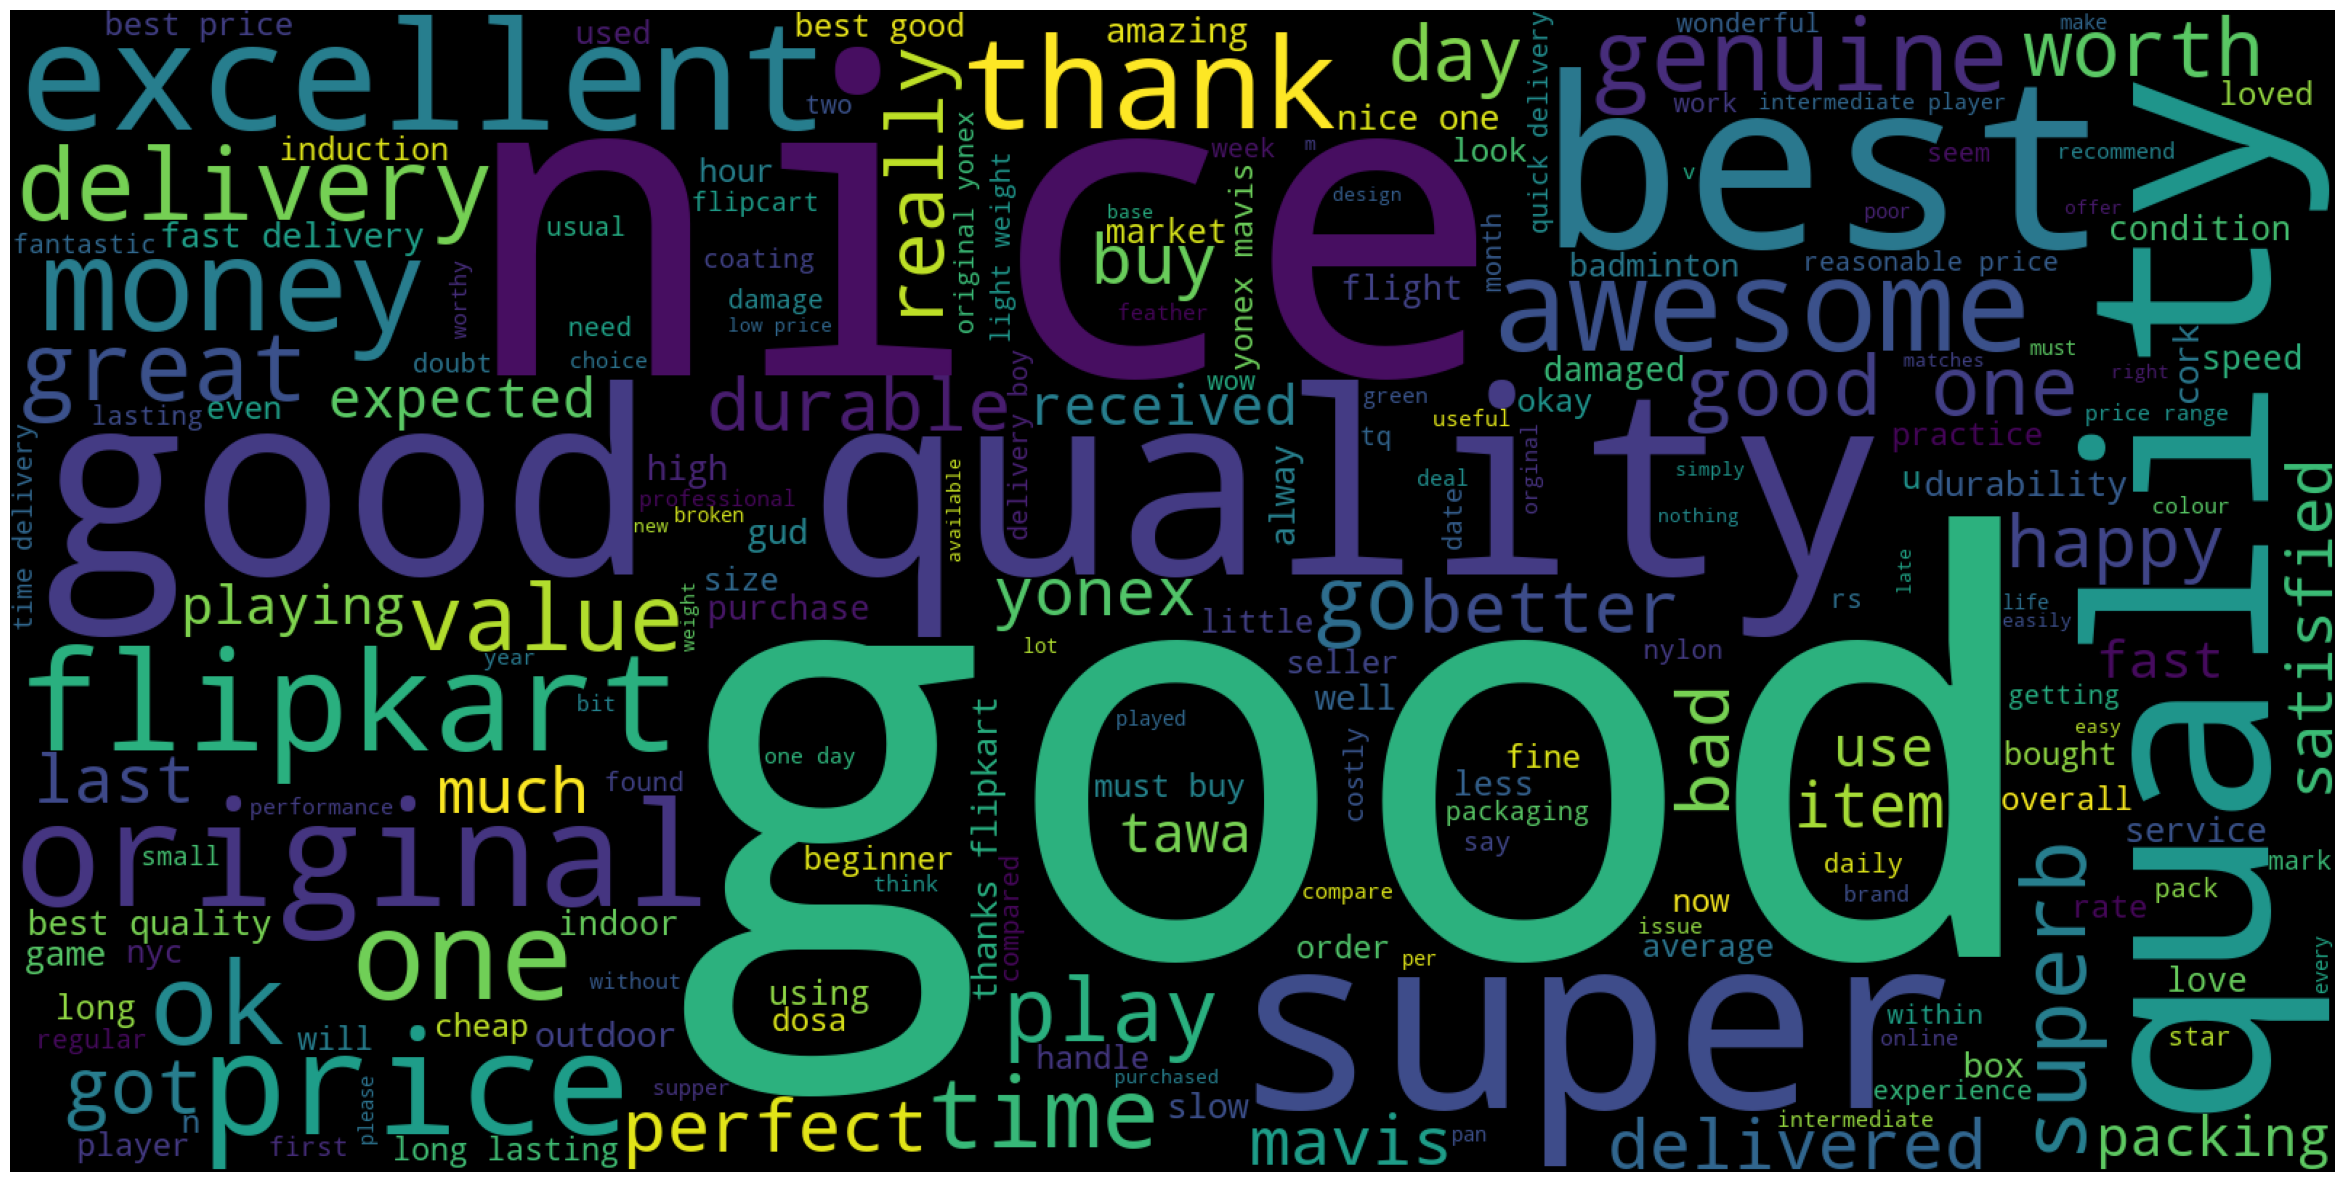

In [27]:
positive_reviews = X_train[y_train == 1]
sentence = positive_reviews.str.replace("READ MORE", "").str.lower()
positive_words = ' '.join(sentence)
positive_cleaned_word = " ".join([word for word in positive_words.split() if 'product' not in word])
positive_cleaned_word = " ".join([word for word in positive_cleaned_word.split() if 'shuttle' not in word])

# Display the wordcloud 
display_wordcloud(positive_cleaned_word)

## Negative Reviews

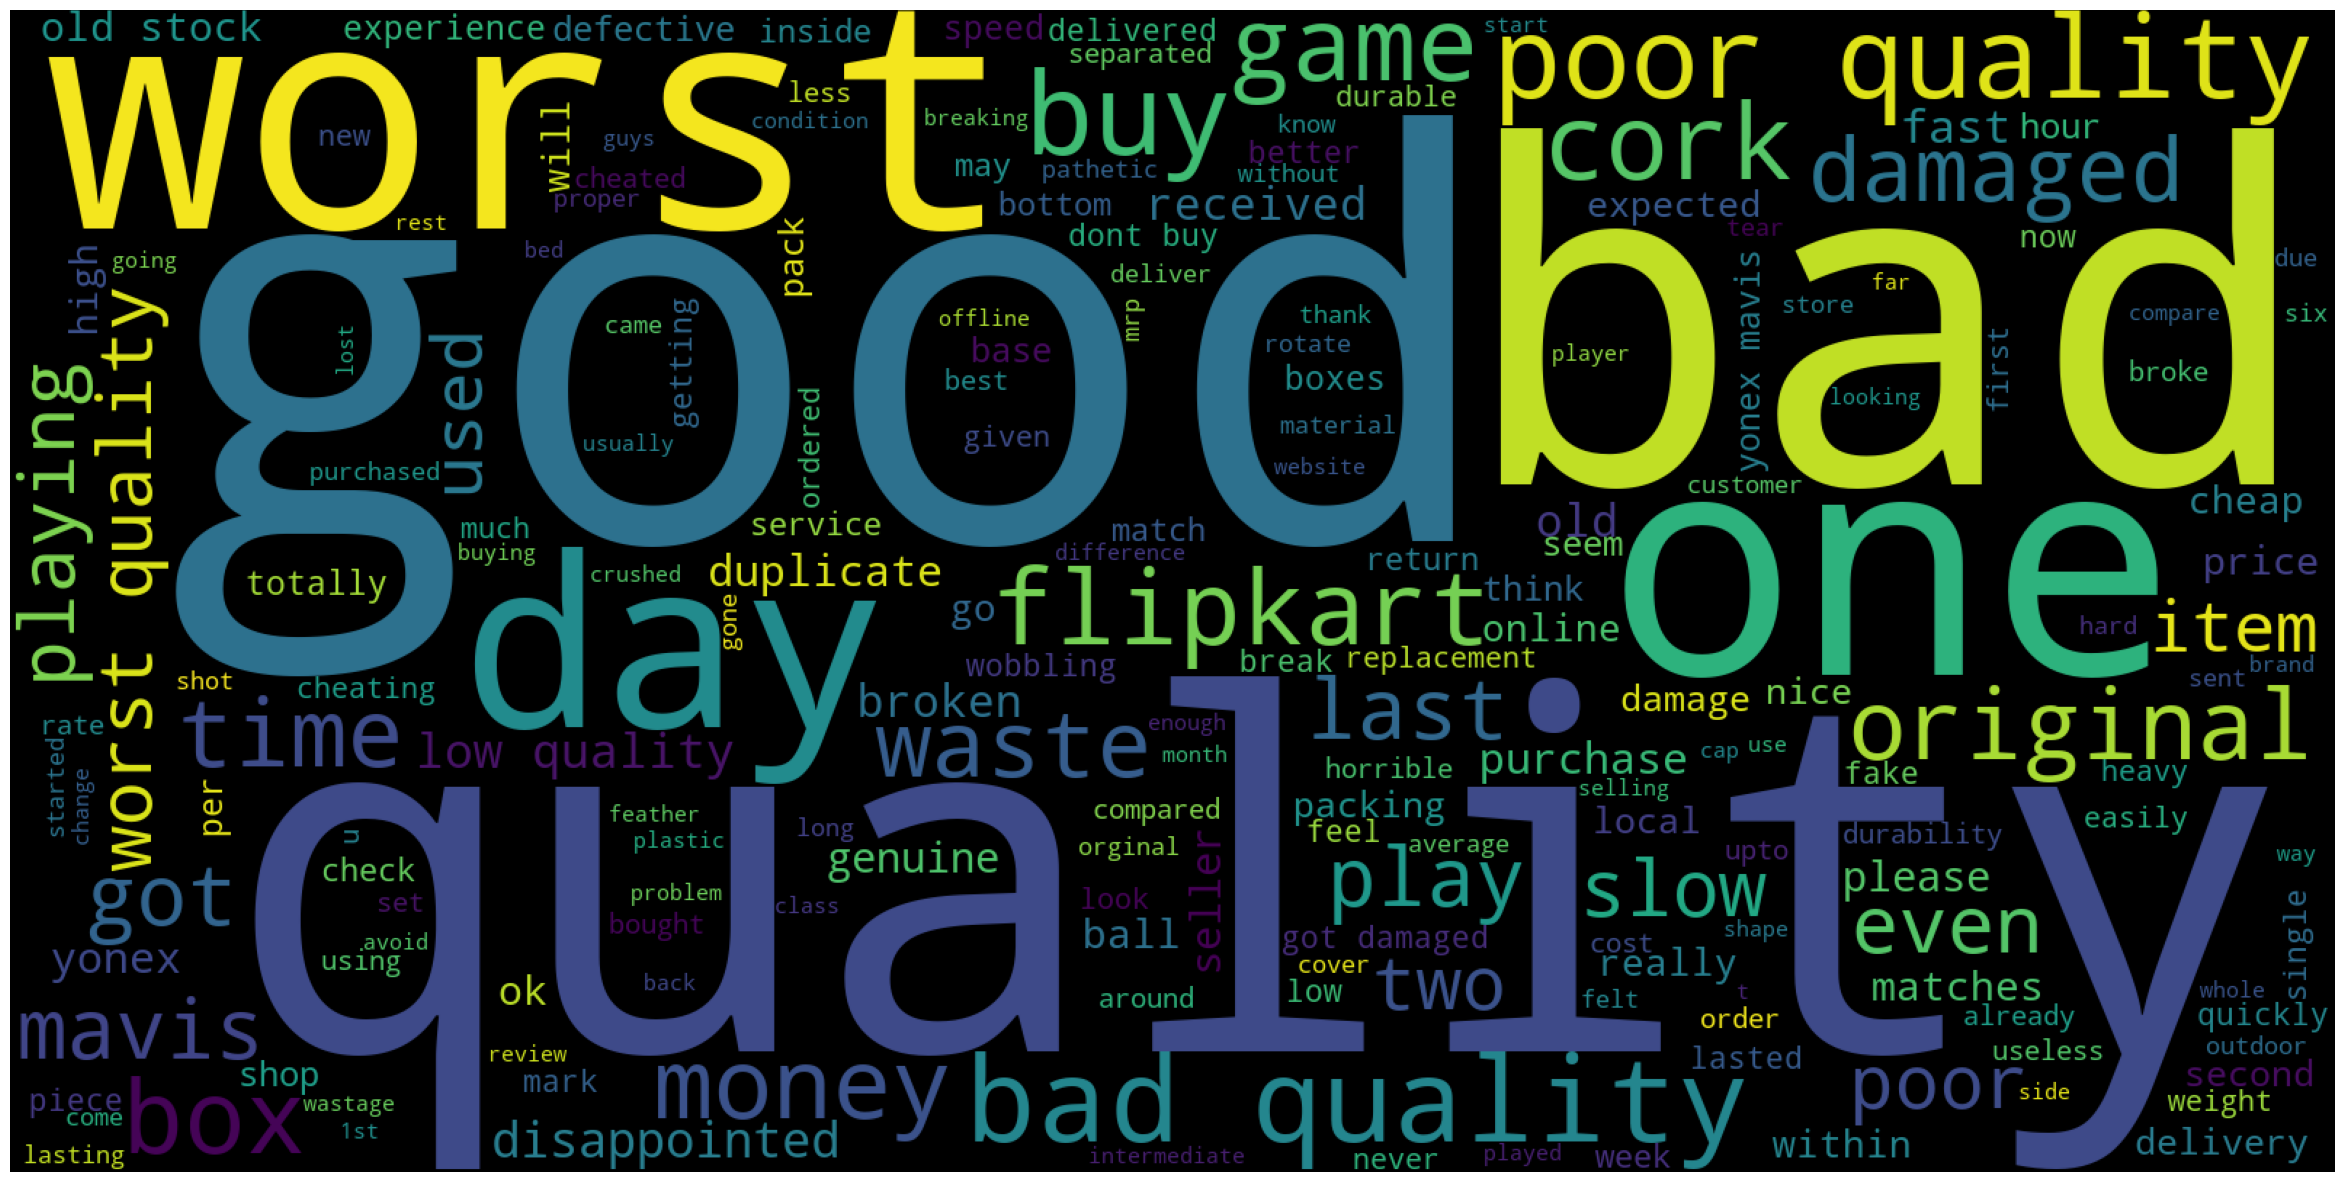

In [28]:
negative_reviews = X_train[y_train == 0]
sentence = negative_reviews.str.replace("READ MORE", "").str.lower()
negative_words = ' '.join(sentence)
negative_cleaned_word = " ".join([word for word in negative_words.split() if 'product' not in word])
negative_cleaned_word = " ".join([word for word in negative_cleaned_word.split() if 'shuttle' not in word])

# Display the wordcloud 
display_wordcloud(negative_cleaned_word)

In [29]:
def preprocess(raw_text):
    
    # Removing special characters and digits

    sentence = re.sub("[^a-zA-Z]|READ MORE", " ", raw_text)
    
    # change sentence to lower case
    sentence = sentence.lower()

    # tokenize into words
    tokens = nltk.word_tokenize(sentence)
    
    # Lemmatize
    lemmatized_tokens = [lemmatizer.lemmatize(token) for token in tokens]

    # Stop word removal
    stop_words = set(stopwords.words('english'))
    cleaned_tokens = [word for word in lemmatized_tokens if word.lower() not in stop_words]
    
    # Join and return
    return " ".join(cleaned_tokens)

In [30]:
# sample of processed word
preprocess(df['review_text'][0])

'nice product good quality price rising bad sign wa affordable price especially play everyday kindly help u term price thank'

## Converting Text to Numerical vectors - BOW Representation

In [31]:
# import feature extraction methods from sklearn
from sklearn.feature_extraction.text import CountVectorizer

# instantiate a vectorizer
vect = CountVectorizer(preprocessor=preprocess)

# use it to extract features from training data
%time
X_train_bow = vect.fit_transform(X_train)
print(X_train_bow.shape)

CPU times: total: 0 ns
Wall time: 0 ns
(8604, 2553)


## Data Preprocessing on test data

In [32]:
# transform testing data (using training data's features)
X_test_bow = vect.transform(X_test)

print(X_test_bow.shape)


(2151, 2553)


## Train the Classifier

In [33]:
# import classifier from sklearn
from sklearn.naive_bayes import MultinomialNB

nb = MultinomialNB() # instantiate a Multinomial Naive Bayes model
%time
nb.fit(X_train_bow, y_train) # train the model(timing it with an IPython "magic command")

CPU times: total: 0 ns
Wall time: 0 ns


MultinomialNB()

## Model Evaluation

In [34]:
from sklearn import metrics
# Evaluate on test data

# make class predictions for X_train_bow
y_train_pred = nb.predict(X_train_bow)

metrics.accuracy_score(y_train, y_train_pred)

0.9439795443979544

[[ 519  346]
 [ 136 7603]]


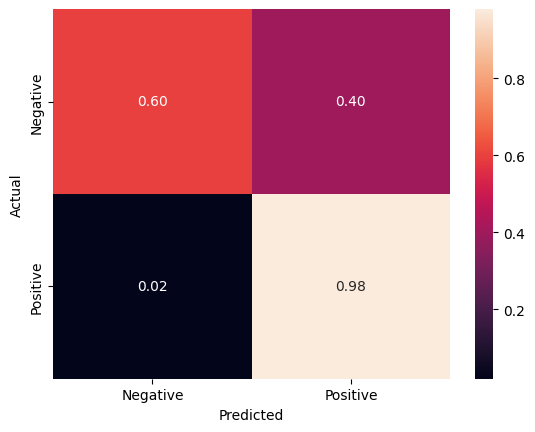

In [35]:
cm = metrics.confusion_matrix(y_train, y_train_pred)
print(cm)
actual = np.sum(cm, axis=1).reshape(-1, 1)
cmn = np.round(cm/actual, 2)
labels = ['0', '1']
labels = ["Negative", "Positive"]
sb.heatmap(cmn, annot=True, fmt='.2f', xticklabels=labels, yticklabels=labels)
plt.ylabel('Actual')
plt.xlabel('Predicted');

In [36]:
# Evaluate on test data

# make class predictions for X_test_dtm
y_test_pred = nb.predict(X_test_bow)

metrics.accuracy_score(y_test, y_test_pred)

0.9330543933054394

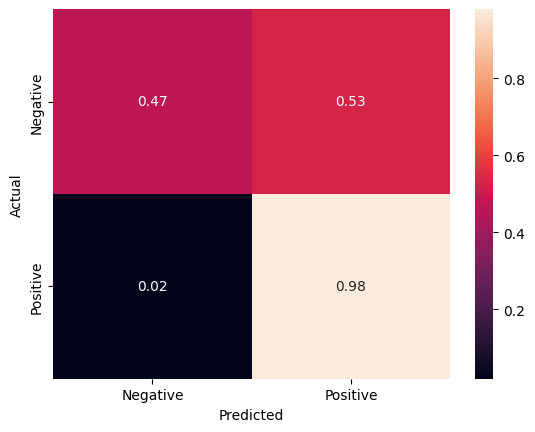

In [37]:
cm = metrics.confusion_matrix(y_test, y_test_pred)
actual = np.sum(cm, axis=1).reshape(-1, 1)
cmn = np.round(cm/actual, 2)

sb.heatmap(cmn, annot=True, fmt='.2f', xticklabels=labels, yticklabels=labels)
plt.ylabel('Actual')
plt.xlabel('Predicted');

In [38]:
class_report = metrics.classification_report(y_test, y_test_pred, target_names=labels)
print(class_report)

              precision    recall  f1-score   support

    Negative       0.74      0.47      0.58       208
    Positive       0.95      0.98      0.96      1943

    accuracy                           0.93      2151
   macro avg       0.84      0.73      0.77      2151
weighted avg       0.93      0.93      0.93      2151



## Create an optimal workflow

In [39]:
from sklearn.pipeline import Pipeline

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import  RandomForestClassifier

from sklearn.model_selection import GridSearchCV

## **Caching to optimize the runtime**

In [40]:
import joblib
from joblib import Memory

import os

In [41]:
# Define a memory object to cache intermediate results
cachedir = '.cache'
memory = Memory(location=cachedir, verbose=0)

# Define the pipeline with caching
pipe = Pipeline(
    [
        ('vectorization', CountVectorizer()),
        ('nb', MultinomialNB())
    ], 
    memory=memory
)

MAX_FEATURES = [1000, 1500, 2000]
ALPHA = [1, 10]

# Observe the Key Value Pair format
parameter_grid = [
    {
        'vectorization__preprocessor': [preprocess],
        'vectorization__max_features': MAX_FEATURES,
        'nb__alpha': ALPHA
    }
]

clf = GridSearchCV(
    estimator=pipe,
    param_grid=parameter_grid,
    scoring='accuracy',
    cv=5,
    return_train_score=True,
    verbose=1
)

%time clf.fit(X_train, y_train)

print("Best estimator found on train set")
print(clf.best_estimator_)
print()

print('Score on Test Data: ', clf.score(X_test, y_test))

Fitting 5 folds for each of 6 candidates, totalling 30 fits
CPU times: total: 2min 24s
Wall time: 2min 40s
Best estimator found on train set
Pipeline(memory=Memory(location=.cache\joblib),
         steps=[('vectorization',
                 CountVectorizer(max_features=2000,
                                 preprocessor=<function preprocess at 0x00000238133E72E0>)),
                ('nb', MultinomialNB(alpha=1))])

Score on Test Data:  0.9330543933054394


In [42]:
# Serialization

best_model = clf.best_estimator_

joblib.dump(best_model, 'best_models/demo_model_nb.pkl')

['best_models/demo_model_nb.pkl']

In [43]:
# Deserialization

model = joblib.load('best_models/demo_model_nb.pkl')
new_data = ["The product arrived in excellent condition, exactly as described on their website",
            "I'm thrilled with the quality and will definitely shop again in the future. Highly recommended",
            "This product is a joke. Cheap materials, terrible functionality",
            "Worst purchase ever. It arrived damaged, and the customer service was nonexistent. Zero stars if I could",
            "Horrible quality! It smells weird and falls apart easily. I wouldn't recommend. Complete waste of money."]

# Make Predictions on new data

new_data_clean = [preprocess(doc) for doc in new_data]
prediction = model.predict(new_data_clean)
print("Prediction:", prediction)

Prediction: [1 1 1 0 0]


In [44]:
# Let's analyse the models prediction time and model size

%time
y_test_pred = model.predict(X_test)

print("Accuracy Score:", metrics.accuracy_score(y_test, y_test_pred))
print("Model Size:", os.path.getsize('best_models/demo_model_nb.pkl'), "Bytes")

CPU times: total: 0 ns
Wall time: 0 ns


Accuracy Score: 0.9330543933054394
Model Size: 131831 Bytes


## **Implementing Memorization to further improve the runtime**

In [45]:
# Improving the efficiency by applying cleaning the text data before hand

%time
X_train_clean = X_train.apply(lambda raw_txt: preprocess(raw_txt))

CPU times: total: 0 ns
Wall time: 0 ns


In [46]:
%time
X_test_clean = X_test.apply(lambda raw_txt: preprocess(raw_txt))

CPU times: total: 0 ns
Wall time: 0 ns


## **Implementing various Algorithms to find the Best Model**

In [47]:
# Define a memory object to cache intermediate results
cachedir = '.cache'
memory = Memory(location=cachedir, verbose=0)

pipelines = {
    'naive_bayes': Pipeline([
        ('vectorization', CountVectorizer()),
        ('classifier', MultinomialNB())
    ], memory=memory),
    'logistic_regression': Pipeline([
        ('vectorization', CountVectorizer()),
        ('classifier', LogisticRegression())
    ], memory=memory),
    'random_forest': Pipeline([
        ('vectorization', CountVectorizer()),
        ('classifier', RandomForestClassifier())
    ], memory=memory)
}

# Define parameter grid for each algorithm
param_grids = {
    'naive_bayes': [
        {
            'vectorization': [CountVectorizer()],
            'vectorization__max_features' : [1000, 1500, 2000, 5000], 
            'classifier__alpha' : [1, 10]
        }
    ],
    'logistic_regression': [
        {
            'vectorization': [CountVectorizer(), TfidfVectorizer()],
            'vectorization__max_features' : [1000, 1500, 2000, 5000], 
            'classifier__C': [0.1, 1, 10], 
            'classifier__penalty': ['elasticnet'], 
            'classifier__l1_ratio': [0.4, 0.5, 0.6],
            'classifier__solver': ['saga'],
            'classifier__class_weight': ['balanced'],
        }
    ],
    'random_forest': [
        {
            'vectorization': [CountVectorizer(), TfidfVectorizer()],
            'vectorization__max_features' : [1000, 1500, 2000, 5000],
            'classifier__max_depth': [None, 5, 10],
            'classifier__n_estimators': [10,20,25],
            'classifier__min_samples_leaf': [2],
            'classifier__bootstrap': [True,False],
            'classifier__class_weight': ['balanced']
        }
    ]
}

# Perform GridSearchCV for each algorithm
best_models = {}

for algorithm in pipelines.keys():
    print("*"*10, algorithm, "*"*10)
    grid_search = GridSearchCV(estimator=pipelines[algorithm], 
                               param_grid=param_grids[algorithm], 
                               cv=5, 
                               scoring='accuracy', 
                               return_train_score=True,
                               verbose=1
                              )
    
    %time 
    grid_search.fit(X_train_clean, y_train)
    
    best_models[algorithm] = grid_search.best_estimator_
    
    print('Score on Test Data: ', grid_search.score(X_test_clean, y_test))

********** naive_bayes **********
CPU times: total: 0 ns
Wall time: 0 ns
Fitting 5 folds for each of 8 candidates, totalling 40 fits


Score on Test Data:  0.9330543933054394
********** logistic_regression **********
CPU times: total: 0 ns
Wall time: 0 ns
Fitting 5 folds for each of 72 candidates, totalling 360 fits
Score on Test Data:  0.9163179916317992
********** random_forest **********
CPU times: total: 0 ns
Wall time: 0 ns
Fitting 5 folds for each of 144 candidates, totalling 720 fits
Score on Test Data:  0.9088795908879591


In [48]:
for name, model in best_models.items():
    print(f"{name}")
    print(f"{model}")
    print()

naive_bayes
Pipeline(memory=Memory(location=.cache\joblib),
         steps=[('vectorization', CountVectorizer(max_features=2000)),
                ('classifier', MultinomialNB(alpha=1))])

logistic_regression
Pipeline(memory=Memory(location=.cache\joblib),
         steps=[('vectorization', CountVectorizer(max_features=5000)),
                ('classifier',
                 LogisticRegression(C=1, class_weight='balanced', l1_ratio=0.6,
                                    penalty='elasticnet', solver='saga'))])

random_forest
Pipeline(memory=Memory(location=.cache\joblib),
         steps=[('vectorization', TfidfVectorizer(max_features=1000)),
                ('classifier',
                 RandomForestClassifier(class_weight='balanced',
                                        min_samples_leaf=2, n_estimators=25))])



## Model Evaluation

In [49]:
for name, model in best_models.items():
    print("*"*10, name, "*"*10)
    
    joblib.dump(model, f'best_models/{name}.pkl')
    model = joblib.load(f'best_models/{name}.pkl')
    %time
    y_test_pred = model.predict(X_test_clean)
    score = metrics.accuracy_score(y_test, y_test_pred)

    print("Accuracy Score", score)
    print("Model Size:", os.path.getsize(f'best_models/{name}.pkl'), "Bytes")

********** naive_bayes **********
CPU times: total: 0 ns
Wall time: 0 ns
Accuracy Score 0.9330543933054394
Model Size: 131815 Bytes
********** logistic_regression **********
CPU times: total: 0 ns
Wall time: 0 ns
Accuracy Score 0.9163179916317992
Model Size: 84586 Bytes
********** random_forest **********
CPU times: total: 0 ns
Wall time: 0 ns
Accuracy Score 0.9088795908879591
Model Size: 953871 Bytes


In [50]:
for name, model in best_models.items():
    y_test_pred = model.predict(X_test_clean)
    # confusion matrix
    cm = metrics.confusion_matrix(y_test, y_test_pred)
    # Recall, Precision, F1-Score ANN mode
    print('{} Confusion matrix:'.format(name))
    print(cm)

    print('classification report:')
    print(metrics.classification_report(y_test, y_test_pred, target_names=labels))

naive_bayes Confusion matrix:
[[ 103  105]
 [  39 1904]]
classification report:
              precision    recall  f1-score   support

    Negative       0.73      0.50      0.59       208
    Positive       0.95      0.98      0.96      1943

    accuracy                           0.93      2151
   macro avg       0.84      0.74      0.78      2151
weighted avg       0.93      0.93      0.93      2151

logistic_regression Confusion matrix:
[[ 146   62]
 [ 118 1825]]
classification report:
              precision    recall  f1-score   support

    Negative       0.55      0.70      0.62       208
    Positive       0.97      0.94      0.95      1943

    accuracy                           0.92      2151
   macro avg       0.76      0.82      0.79      2151
weighted avg       0.93      0.92      0.92      2151

random_forest Confusion matrix:
[[ 148   60]
 [ 136 1807]]
classification report:
              precision    recall  f1-score   support

    Negative       0.52      0.71      0.

Ealuating using f1 score, all models score well on positive classification, naive bayes model scored less on negative classification compared to the other models

## Test model on new data

In [56]:
demo =joblib.load('best_models/demo_model_nb.pkl')
nb = joblib.load('best_models/naive_bayes.pkl')
log_reg = joblib.load('best_models/logistic_regression.pkl')
rf = joblib.load('best_models/random_forest.pkl')

pos_data = ["The product arrived in excellent condition, exactly as described on their website",
            "I love the quality and will definitely shop again in the future. Highly recommended",
            "I'm thrilled with the quality and will definitely shop again in the future. Highly recommended",
            "Efficient and user friendly, exceeded my expectations"]

new_data_clean = [preprocess(doc) for doc in pos_data]

# Make Predictions on new data
demo_prediction =nb.predict(new_data_clean)
nb_prediction = nb.predict(new_data_clean)
log_reg_prediction = log_reg.predict(new_data_clean)
dt_prediction = rf.predict(new_data_clean)

print("Demo model Prediction:", demo_prediction)
print("Naive Bayes Prediction:", nb_prediction)
print("Logistic Regression Prediction:", log_reg_prediction)
print("Random Forest Prediction:", dt_prediction)

Demo model Prediction: [1 1 1 1]
Naive Bayes Prediction: [1 1 1 1]
Logistic Regression Prediction: [1 0 1 1]
Random Forest Prediction: [1 0 0 1]


naive bayes did best on positive review

In [57]:
neg_data = ["Worst purchase ever. It arrived damaged, Zero stars if I could","bad product",
            "Horrible quality! It smells weird and falls apart easily. Complete waste of money.",
            "This product is a joke. Cheap materials, terrible functionality",
            "Worst purchase ever. It arrived damaged, and the customer service was nonexistent. Zero stars if I could",
            "Horrible quality! It smells weird and falls apart easily. I wouldn't recommend. Complete waste of money."]

new_data_clean = [preprocess(doc) for doc in neg_data]

# Make Predictions on new data
demo_prediction =nb.predict(new_data_clean)
nb_prediction = nb.predict(new_data_clean)
log_reg_prediction = log_reg.predict(new_data_clean)
dt_prediction = rf.predict(new_data_clean)

print("Demo model Prediction:", demo_prediction)
print("Naive Bayes Prediction:", nb_prediction)
print("Logistic Regression Prediction:", log_reg_prediction)
print("Random Forest Prediction:", dt_prediction)

Demo model Prediction: [0 1 0 1 0 0]
Naive Bayes Prediction: [0 1 0 1 0 0]
Logistic Regression Prediction: [0 0 0 0 0 0]
Random Forest Prediction: [0 0 0 1 0 0]


Logistic Regression did best on negative review